<a href="https://colab.research.google.com/github/dmb0018/CS6625_MachineLearningHealthSystem/blob/main/HealthSystemMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

David Bryant
CS 6625 - Specialized Study
Machine Learning Health System

In [2]:
#Import information from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, average_precision_score, precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from seaborn import heatmap


# Upload made up data that will be used to train model
test_data_file = "/content/drive/My Drive/MadeUpData.csv"
df_testdata = pd.read_csv(test_data_file)

# Drop patient number column as it is unneccessary in model
df_testdata.drop(df_testdata.columns[0],axis=1,inplace=True)

# Create numerical categories for each feature as well as the target of the model
df_testdata = df_testdata.astype('category')
df_testdata['FamilyHistory'] = df_testdata['FamilyHistory'].cat.codes
df_testdata['PersonalHistory'] = df_testdata['PersonalHistory'].cat.codes
df_testdata['Pain'] = df_testdata['Pain'].cat.codes
df_testdata['Depression'] = df_testdata['Depression'].cat.codes
df_testdata['Anxiety'] = df_testdata['Anxiety'].cat.codes
df_testdata['Confusion'] = df_testdata['Confusion'].cat.codes
df_testdata['Fatigue'] = df_testdata['Fatigue'].cat.codes
df_testdata['Breathlessness'] = df_testdata['Breathlessness'].cat.codes
df_testdata['Insomnia'] = df_testdata['Insomnia'].cat.codes
df_testdata['Nausea'] = df_testdata['Nausea'].cat.codes
df_testdata['Constipation'] = df_testdata['Constipation'].cat.codes
df_testdata['Diarrhea'] = df_testdata['Diarrhea'].cat.codes
df_testdata['Anorexia'] = df_testdata['Anorexia'].cat.codes
df_testdata['Diagnosis'] = df_testdata['Diagnosis'].cat.codes

# Take the target out of the dataframe and put it in a separate variable
y = df_testdata['Diagnosis']
df_testdata.drop(df_testdata.columns[13],axis=1,inplace=True)
X = df_testdata

# Fit the target
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
y = label_encoder.transform(y)

In [5]:
# Create parameters for model
param = {
    'max_depth': 2,  # the maximum depth of each tree
    'eta': 0.3,  # training step
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 5}  # the number of classes that exist in this datset
num_round = 30  # the number of training iterations

# Create arrays and counters for loop
range_number = 500
accuracy_array = [0]*range_number
precision_array = [0] * range_number
perfect_array = [0] * 2
perfect_counter = 0
current_max = 0

# Create loop to try a large number of different training sets to confirm accuracy level of model
for x in range(range_number):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=x) #Random state = x being only part that is different every loop
  #train model
  dtrain = xgb.DMatrix(X_train, label=y_train)
  dtest = xgb.DMatrix(X_test, label=y_test)
  model = xgb.train(param, dtrain, num_round)

  #Use model to make predictions and store precision/accuracy of predictions
  preds = model.predict(dtest)
  best_predictions = np.asarray([np.argmax(line) for line in preds])
  precision_array[x] = precision_score(y_test, best_predictions, average='macro',zero_division=True)
  accuracy_array[x] = accuracy_score(y_test, best_predictions)
  # Update the current max accuracy if it is higher than previous max accuracy
  if accuracy_array[x] > current_max:
    max_location = x
    current_max = accuracy_array[x]
  # Keep location of any seed values that provide an accuracy of 1
  if accuracy_array[x] == 1:
    perfect_array[perfect_counter] = x
    perfect_counter = perfect_counter + 1

# Calculate and display average precision of all training models using 500 different seeds
average_precision = sum(precision_array) / len(precision_array)
print("Average precision of 500 random seeds for the training values:", average_precision)

# Calculate and display average accuracy of all training models using 500 different seeds
average_accuracy = sum(accuracy_array) / len(accuracy_array)
print("Average accuracy of 500 random seeds for the training values", average_accuracy)

# Provide values for random seed that create an accuracy of 1 for the model
print("Values for random seed that provide a perfect accuracy of 1:", perfect_array)


Average precision of 500 random seeds for the training values: 0.7323684060384061
Average accuracy of 500 random seeds for the training values 0.7222000000000005
Values for random seed that provide a perfect accuracy of 1: [100, 468]


The predictions are as follows: [4, 3, 1, 4, 4, 1, 4, 4, 1, 1, 4, 2, 4, 1, 4, 4, 1, 3, 4, 3]
The actual values are as follows:  [4 3 1 4 4 1 4 4 1 1 4 2 4 1 4 4 1 3 4 3]
precision: 1.0
accuracy: 1.0


[Text(50.722222222222214, 0.5, 'Actual'),
 Text(0.5, 23.52222222222222, 'Predicted'),
 Text(0.5, 1.0, 'Disease Prediction Confusion Matrix')]

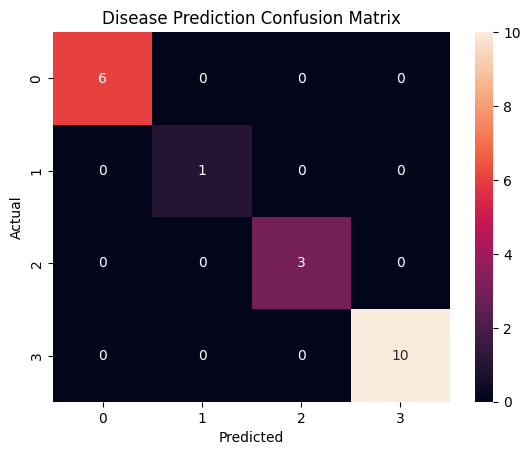

In [6]:
# Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
model = xgb.train(param, dtrain, num_round)


# Test
model_predictions = [np.argmax(prediction) for prediction in model.predict(dtest)]
print("The predictions are as follows:", model_predictions)
print("The actual values are as follows: ", y_test)

# results
print("precision:", precision_score(y_test, model_predictions,average='micro'))
print("accuracy:", accuracy_score(y_test, model_predictions))
conf_mat = confusion_matrix(y_test, model_predictions)
ax = heatmap(conf_mat, annot=True, fmt='.4g')
ax.set(ylabel="Actual", xlabel="Predicted", title="Disease Prediction Confusion Matrix")

The predictions are as follows: [1, 4, 2, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 1, 1, 3, 2, 4, 4]
The actual values are as follows:  [1 4 2 4 3 4 2 4 0 4 3 1 4 4 1 1 3 4 4 4]
precision: 0.75
accuracy: 0.75


[Text(50.722222222222214, 0.5, 'Actual'),
 Text(0.5, 23.52222222222222, 'Predicted'),
 Text(0.5, 1.0, 'Disease Prediction Confusion Matrix')]

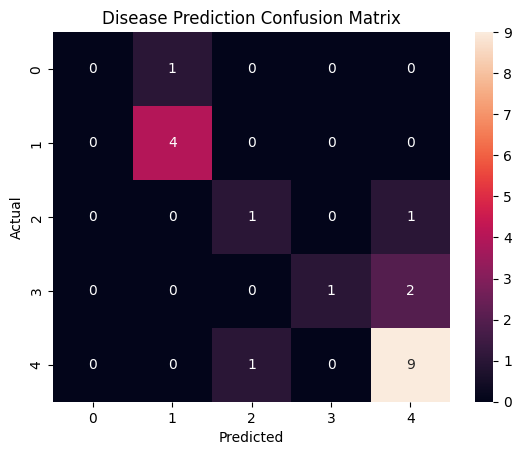

In [7]:
#Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
model = xgb.train(param, dtrain, num_round)


# Test
model_predictions = [np.argmax(prediction) for prediction in model.predict(dtest)]

# Display the predicted values as well as the actual values
print("The predictions are as follows:", model_predictions)
print("The actual values are as follows: ", y_test)

# Display results of model
print("precision:", precision_score(y_test, model_predictions,average='micro'))
print("accuracy:", accuracy_score(y_test, model_predictions))
conf_mat = confusion_matrix(y_test, model_predictions)
ax = heatmap(conf_mat, annot=True, fmt='.4g')
ax.set(ylabel="Actual", xlabel="Predicted", title="Disease Prediction Confusion Matrix")

In [9]:
# Upload symptoms and prevelence csv file
path_train = "/content/drive/My Drive/RawData.csv"
df = pd.read_csv(path_train)

#Make display show all rows and columns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Create arrays of diseases, prevalence and incidence of each disease
diseases = df['Disease']
prevalence = df['Prevalence']
incidence = df['Incidence']

# Find totals for prevalence and incidence of the five different diseases
prevalence_total = prevalence.sum()
incidence_total = incidence.sum()

# Create new columns in data frame that show how much each disease is of the total percent
df['PrevalencePercent'] = df['Prevalence']/prevalence_total
df['IncidencePercent'] = df['Incidence']/incidence_total

US_population_2019 = 328239523 # Source - https://www.census.gov/newsroom/press-releases/2019/popest-nation.html
df['PrevalenceRate'] = df['Prevalence']/US_population_2019
df['IncidenceRate'] = df['Incidence']/US_population_2019

print(df.head(5))

  Disease  Pain  Depression  Anxiety  Confusion  Fatigue  Breathlessness  \
0  Cancer  65.5        40.0     46.0       49.5     61.0            40.0   
1    AIDS  71.5        46.0     21.0       47.5     69.5            36.5   
2      HD  59.0        22.5     49.0       25.0     75.5            74.0   
3    COPD  55.5        54.0     63.0       25.5     74.0            92.5   
4      RD  48.5        32.5     54.5       25.0     80.0            36.5   

   Insomnia  Nausea  Constipation  Diarrhea  Anorexia  Prevalence  \
0        39    37.0          44.0        16      61.0    11896983   
1        74    46.0          34.5        60      51.0     1743128   
2        42    32.5          40.0        12      31.0    18735872   
3        60    28.0          35.5        24      51.0    20147917   
4        51    36.5          49.5        21      44.5    40241611   

     Incidence  PrevalencePercent  IncidencePercent  PrevalenceRate  \
0  5892097.137           0.128248          0.565237      

In [13]:
personal_disease_history = [0]*5 # Store personal histroy of disease, 0 if never been diagnosed with disease, 1 for has been diagnosed with disease
numberInputs = 10 # Number of allowed inputs
for x in range(numberInputs):
  userInput = input("Have you ever been diagnosed with any of the following diseases:\n1) Cancer \n2) AIDS \n3) Heart Disease \n4) COPD \n5) Renal Disease\nType 'end' or 'quit' to finish putting in medical history\n")
  determineInput_PersonalMedicalHistory()
  if userInput == "quit" or userInput == "end" or userInput == "Quit" or userInput == "End":
    break

print("Personal Disease History: ", personal_disease_history)

Have you ever been diagnosed with any of the following diseases:
1) Cancer 
2) AIDS 
3) Heart Disease 
4) COPD 
5) Renal Disease
Type 'end' or 'quit' to finish putting in medical history
5
You have entered Renal Disease as something that you have been diagnosed with in the past.


Have you ever been diagnosed with any of the following diseases:
1) Cancer 
2) AIDS 
3) Heart Disease 
4) COPD 
5) Renal Disease
Type 'end' or 'quit' to finish putting in medical history
end
Thank you for inputting your personal medical history.
Personal Disease History:  [0, 0, 0, 0, 1]


In [14]:
family_disease_history = [0]*5 # Store family histroy of disease, 0 for no disease in family history, 1 for has disease in family history
numberInputs = 10 # Number of allowed inputs
for x in range(numberInputs):
  userInput = input("Have any of your blood relatives been diagnosed with any of the following diseases:\n1) Cancer \n2) AIDS \n3) Heart Disease \n4) COPD \n5) Renal Disease\nType 'end' or 'quit' to finish putting in medical history\n")
  determineInput_FamilyMedicalHistory()
  if userInput == "quit" or userInput == "end" or userInput == "Quit" or userInput == "End":
    break

print("Family Disease History: ", family_disease_history)



Have any of your blood relatives been diagnosed with any of the following diseases:
1) Cancer 
2) AIDS 
3) Heart Disease 
4) COPD 
5) Renal Disease
Type 'end' or 'quit' to finish putting in medical history
3
You have entered Heart Disease as something one of your family members has been diagnosed with.


Have any of your blood relatives been diagnosed with any of the following diseases:
1) Cancer 
2) AIDS 
3) Heart Disease 
4) COPD 
5) Renal Disease
Type 'end' or 'quit' to finish putting in medical history
end
Thank you for inputting your family medical history.
Family Disease History:  [0, 0, 1, 0, 0]


In [15]:
symptoms = [0]*11
numberInputs = 20
for x in range(numberInputs):
  userInput = input("Please choose from the following possible symptoms that you are experiencing:\n1) Pain \n2) Depression \n3) Anxiety \n4) Confusion \n5) Fatigue \n6) Breathlessness \n7) Insomnia \n8) Nausea \n9) Constipation \n10) Diarrhea \n11) Anorexia\nType 'end' or 'quit' to finish putting in symptoms\n")
  determineInput_Symptoms()
  if userInput == "quit" or userInput == "end" or userInput == "Quit" or userInput == "End":
    break

print(symptoms)

Please choose from the following possible symptoms that you are experiencing:
1) Pain 
2) Depression 
3) Anxiety 
4) Confusion 
5) Fatigue 
6) Breathlessness 
7) Insomnia 
8) Nausea 
9) Constipation 
10) Diarrhea 
11) Anorexia
Type 'end' or 'quit' to finish putting in symptoms
3
You have input anxiety as one of your symptoms.


Please choose from the following possible symptoms that you are experiencing:
1) Pain 
2) Depression 
3) Anxiety 
4) Confusion 
5) Fatigue 
6) Breathlessness 
7) Insomnia 
8) Nausea 
9) Constipation 
10) Diarrhea 
11) Anorexia
Type 'end' or 'quit' to finish putting in symptoms
Insomnia
You have input insomnia as one of your symptoms.


Please choose from the following possible symptoms that you are experiencing:
1) Pain 
2) Depression 
3) Anxiety 
4) Confusion 
5) Fatigue 
6) Breathlessness 
7) Insomnia 
8) Nausea 
9) Constipation 
10) Diarrhea 
11) Anorexia
Type 'end' or 'quit' to finish putting in symptoms
diarrhea
You have input diarrhea as one of your sympto

In [16]:
prevalence_patient_disease = prevalence

# Display the personal disease history of the user
if(sum(personal_disease_history) > 0):
  print("You have been diagnosed with the following diseases:")
  if personal_disease_history[0] == 1:
    print("Cancer")
  if personal_disease_history[1] == 1:
    print("AIDS")
  if personal_disease_history[2] == 1:
    print("Heart Disease")
  if personal_disease_history[3] == 1:
    print("COPD")
  if personal_disease_history[4] == 1:
    print("Renal Disease")
  print("\n")

# Display the family disease history of the user
if(sum(family_disease_history) > 0):
  print("One of your blood relatives have been diagnosed with the following diseases:")
  if family_disease_history[0] == 1:
    print("Cancer")
  if family_disease_history[1] == 1:
    print("AIDS")
  if family_disease_history[2] == 1:
    print("Heart Disease")
  if family_disease_history[3] == 1:
    print("COPD")
  if family_disease_history[4] == 1:
    print("Renal Disease")
  print("\n")

# Display the symptoms listed by the user and adjust prevalence rates for each disease based upon having that symptom
print("Your Sypmtoms include:")
if symptoms[0] == 1:
  prevalence_patient_disease = prevalence_patient_disease * df['Pain']/100
  print("Pain")
if symptoms[1] == 1:
  print("Depression")
  prevalence_patient_disease = prevalence_patient_disease * df['Depression']/100
if symptoms[2] == 1:
  print("Anxiety")
  prevalence_patient_disease = prevalence_patient_disease * df['Anxiety']/100
if symptoms[3] == 1:
  print("Confusion")
  prevalence_patient_disease = prevalence_patient_disease * df['Confusion']/100
if symptoms[4] == 1:
  print("Fatigue")
  prevalence_patient_disease = prevalence_patient_disease * df['Fatigue']/100
if symptoms[5] == 1:
  print("Breathlessness")
  prevalence_patient_disease = prevalence_patient_disease * df['Breathlessness']/100
if symptoms[6] == 1:
  print("Insomnia")
  prevalence_patient_disease = prevalence_patient_disease * df['Insomnia']/100
if symptoms[7] == 1:
  print("Nausea")
  prevalence_patient_disease = prevalence_patient_disease * df['Nausea']/100
if symptoms[8] == 1:
  print("Constipation")
  prevalence_patient_disease = prevalence_patient_disease * df['Constipation']/100
if symptoms[9] == 1:
  print("Diarrhea")
  prevalence_patient_disease = prevalence_patient_disease * df['Diarrhea']/100
if symptoms[10] == 1:
  print("Anorexia")
  prevalence_patient_disease = prevalence_patient_disease * df['Anorexia']/100

# Display the updated prevalence values following adjustments made due to symptoms experienced by user
print("\n")
print("Adjusted prevalence numbers based on symptoms:")
print(prevalence_patient_disease)

# Find and display the updated percent chance of having each disease
percent_prevalence = prevalence_patient_disease/prevalence_patient_disease.sum()
print("\n")
print("Adjusted prevalence percents based on symptoms:")
print(percent_prevalence)

You have been diagnosed with the following diseases:
Renal Disease


One of your blood relatives have been diagnosed with the following diseases:
Heart Disease


Your Sypmtoms include:
Anxiety
Insomnia
Diarrhea
Anorexia


Adjusted prevalence numbers based on symptoms:
0    2.083095e+05
1    8.288992e+04
2    1.434373e+05
3    9.321877e+05
4    1.045253e+06
dtype: float64


Adjusted prevalence percents based on symptoms:
0    0.086361
1    0.034365
2    0.059466
3    0.386467
4    0.433341
dtype: float64


In [12]:
# Function to take input from user on family medical history
def determineInput_FamilyMedicalHistory():
  if userInput == "1" or userInput == "1." or userInput == "1)" or userInput == "Cancer" or userInput == "cancer":
    family_disease_history[0] = 1
    print("You have entered cancer as something one of your family members has been diagnosed with.\n\n")
  elif userInput == "2" or userInput == "2." or userInput == "2)" or userInput == "AIDS" or userInput == "AIDS":
    family_disease_history[1] = 1
    print("You have entered AIDS as something one of your family members has been diagnosed with.\n\n")
  elif userInput == "3" or userInput == "3." or userInput == "3)" or userInput == "Heart Disease" or userInput == "heart disease":
    family_disease_history[2] = 1
    print("You have entered Heart Disease as something one of your family members has been diagnosed with.\n\n")
  elif userInput == "4" or userInput == "4." or userInput == "4)" or userInput == "COPD" or userInput == "COPD":
    family_disease_history[3] = 1
    print("You have entered COPD as something one of your family members has been diagnosed with.\n\n")
  elif userInput == "5" or userInput == "5." or userInput == "5)" or userInput == "Renal Disease" or userInput == "Renal Disease":
    family_disease_history[4] = 1
    print("You have entered Renal Disease as something one of your family members has been diagnosed with.\n\n")
  elif userInput == "quit" or userInput == "end" or userInput == "Quit" or userInput == "End":
    print("Thank you for inputting your family medical history.")
  else:
    print("Input not understood. Please try again.")

In [10]:
# Function to take input from user on personal medical history
def determineInput_PersonalMedicalHistory():
  if userInput == "1" or userInput == "1." or userInput == "1)" or userInput == "Cancer" or userInput == "cancer":
    personal_disease_history[0] = 1
    print("You have entered cancer as something that you have been diagnosed with in the past.\n\n")
  elif userInput == "2" or userInput == "2." or userInput == "2)" or userInput == "AIDS" or userInput == "AIDS":
    personal_disease_history[1] = 1
    print("You have entered AIDS as something that you have been diagnosed with in the past.\n\n")
  elif userInput == "3" or userInput == "3." or userInput == "3)" or userInput == "Heart Disease" or userInput == "heart disease":
    personal_disease_history[2] = 1
    print("You have entered Heart Disease as something that you have been diagnosed with in the past.\n\n")
  elif userInput == "4" or userInput == "4." or userInput == "4)" or userInput == "COPD" or userInput == "COPD":
    personal_disease_history[3] = 1
    print("You have entered COPD as something that you have been diagnosed with in the past.\n\n")
  elif userInput == "5" or userInput == "5." or userInput == "5)" or userInput == "Renal Disease" or userInput == "Renal Disease":
    personal_disease_history[4] = 1
    print("You have entered Renal Disease as something that you have been diagnosed with in the past.\n\n")
  elif userInput == "quit" or userInput == "end" or userInput == "Quit" or userInput == "End":
    print("Thank you for inputting your personal medical history.")
  else:
    print("Input not understood. Please try again.")

In [11]:
# Function to take input from user on symptoms they are experiencing
def determineInput_Symptoms():
  if userInput == "1" or userInput == "1." or userInput == "1)" or userInput == "Pain" or userInput == "pain":
    symptoms[0] = 1
    print("You have input pain as one of your symptoms.\n\n")
  elif userInput == "2" or userInput == "2." or userInput == "2)" or userInput == "Depression" or userInput == "depression":
    symptoms[1] = 1
    print("You have input depression as one of your symptoms.\n\n")
  elif userInput == "3" or userInput == "3." or userInput == "3)" or userInput == "Anxiety" or userInput == "anxiety":
    symptoms[2] = 1
    print("You have input anxiety as one of your symptoms.\n\n")
  elif userInput == "4" or userInput == "4." or userInput == "4)" or userInput == "Confusion" or userInput == "confusion":
    symptoms[3] = 1
    print("You have input confusion as one of your symptoms.\n\n")
  elif userInput == "5" or userInput == "5." or userInput == "5)" or userInput == "Fatigue" or userInput == "fatigue":
    symptoms[4] = 1
    print("You have input fatigue as one of your symptoms.\n\n")
  elif userInput == "6" or userInput == "6." or userInput == "6)" or userInput == "Breathlessness" or userInput == "breathlessness":
    symptoms[5] = 1
    print("You have input breathlessness as one of your symptoms.\n\n")
  elif userInput == "7" or userInput == "7." or userInput == "7)" or userInput == "Insomnia" or userInput == "insomnia":
    symptoms[6] = 1
    print("You have input insomnia as one of your symptoms.\n\n")
  elif userInput == "8" or userInput == "8." or userInput == "8)" or userInput == "Nausea" or userInput == "nausea":
    symptoms[7] = 1
    print("You have input nausea as one of your symptoms.\n\n")
  elif userInput == "9" or userInput == "9." or userInput == "9)" or userInput == "Constipation" or userInput == "constipation":
    symptoms[8] = 1
    print("You have input constipation as one of your symptoms.\n\n")
  elif userInput == "10" or userInput == "10." or userInput == "10)" or userInput == "Diarrhea" or userInput == "diarrhea":
    symptoms[9] = 1
    print("You have input diarrhea as one of your symptoms.\n\n")
  elif userInput == "11" or userInput == "11." or userInput == "11)" or userInput == "Anorexia" or userInput == "anorexia":
    symptoms[10] = 1
    print("You have input anorexia as one of your symptoms.\n\n")
  elif userInput == "quit" or userInput == "end" or userInput == "Quit" or userInput == "End":
    print("Thank you for inputting your symptoms.")
    ##Might do next step here
  else:
    print("Input not understood. Please try again.")
